In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('log_reg_real_data.csv')

In [6]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
X                                      15493 non-null int64
jumlah_kartu                           15493 non-null int64
outstanding                            15493 non-null int64
limit_kredit                           15493 non-null float64
tagihan                                15493 non-null float64
total_pemakaian_tunai                  15493 non-null float64
total_pemakaian_retail                 15493 non-null float64
sisa_tagihan_tidak_terbayar            15493 non-null float64
kode_cabang                            15393 non-null object
rasio_pembayaran                       15493 non-null float64
persentasi_overlimit                   15493 non-null float64
rasio_pembayaran_3bulan                15493 non-null float64
rasio_pembayaran_6bulan                15493 non-null float64
skor_delikuensi                        15493 non-null int64
flag_kredit_macet               

In [7]:
df.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [5]:
df.describe()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran,persentasi_overlimit,...,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15493.000000,15493.000000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.00000,15493.000000,...,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,7747.000000,2.506551,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.64712,3.343533,...,0.087717,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719
std,4472.588196,1.012655,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.16940,9.241921,...,0.282892,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350
min,1.000000,1.000000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.00000,0.000000,...,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,3874.000000,2.000000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,...,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000
50%,7747.000000,2.000000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.00000,0.000000,...,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000
75%,11620.000000,3.000000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.00000,1.060000,...,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000
max,15493.000000,16.000000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.00000,190.000000,...,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


# Cleaning Data

In [8]:
df.flag_kredit_macet.value_counts(normalize=True)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

In [10]:
df[df['flag_kredit_macet']==1]['kode_cabang'].value_counts()

A    767
F    144
B    132
I    102
E     57
H     33
J     33
G     30
C     27
K     17
D     12
Name: kode_cabang, dtype: int64

In [9]:
df[(df.kode_cabang.isnull()) & (df['flag_kredit_macet']==1)].index

Int64Index([946, 3454, 5089, 5533, 9206], dtype='int64')

In [11]:
df=df.drop(df[(df.kode_cabang.isnull()) & (df['flag_kredit_macet']==0)].index)

In [12]:
df['kode_cabang'].fillna('A',inplace=True)

# Delete Outlier data dengan Flag Kredit macet = 0

In [13]:
kolom=df.drop(['X','kode_cabang','flag_kredit_macet'],axis=1).columns

In [14]:
def detect_outlier_by_columns(df,col):
    listindex=[]
    for item in col:
        q1=df[item].quantile(0.25)
        q3=df[item].quantile(0.75)
        iqr = q3 - q1
        lower=q1-(iqr*1.5)
        upper=q3+(iqr*1.5)
        listindex.append(list(df[(df[item]<lower) | (df[item]>upper) & (df['flag_kredit_macet']==0)].index))
    return listindex

In [15]:
listindexoutlier=detect_outlier_by_columns(df,kolom)

In [16]:
dict_outlier={}
for item in listindexoutlier:
    for idx in item:
        if idx in dict_outlier:
            dict_outlier[idx]+=1
        else:
            dict_outlier[idx]=1
dict_outlier

{27: 5,
 41: 1,
 73: 8,
 86: 3,
 96: 6,
 99: 1,
 114: 3,
 121: 4,
 130: 2,
 140: 5,
 156: 9,
 166: 6,
 226: 7,
 305: 5,
 313: 10,
 321: 3,
 390: 1,
 391: 4,
 398: 2,
 410: 9,
 437: 2,
 514: 2,
 570: 2,
 579: 7,
 607: 8,
 629: 5,
 641: 2,
 699: 4,
 731: 5,
 735: 7,
 741: 2,
 833: 1,
 878: 5,
 886: 7,
 888: 1,
 895: 4,
 909: 2,
 924: 5,
 1011: 1,
 1020: 1,
 1051: 9,
 1073: 6,
 1102: 6,
 1156: 7,
 1181: 8,
 1195: 1,
 1204: 5,
 1206: 2,
 1218: 1,
 1224: 4,
 1318: 3,
 1326: 6,
 1330: 6,
 1357: 2,
 1378: 5,
 1380: 1,
 1389: 7,
 1403: 1,
 1417: 1,
 1451: 2,
 1476: 2,
 1495: 3,
 1519: 4,
 1535: 4,
 1559: 9,
 1562: 4,
 1605: 6,
 1610: 2,
 1638: 1,
 1643: 9,
 1679: 9,
 1714: 3,
 1724: 4,
 1750: 9,
 1757: 8,
 1765: 5,
 1771: 1,
 1786: 3,
 1798: 7,
 1830: 8,
 1853: 8,
 1899: 4,
 1912: 7,
 1921: 2,
 1937: 5,
 1945: 4,
 1965: 6,
 1966: 8,
 1974: 4,
 1983: 6,
 1996: 4,
 2014: 2,
 2028: 5,
 2043: 7,
 2059: 3,
 2064: 2,
 2069: 2,
 2080: 8,
 2100: 5,
 2122: 2,
 2154: 8,
 2172: 6,
 2233: 1,
 2274: 5,
 22

In [22]:
idxtodrop=[]
for key,value in dict_outlier.items():
    if value >=3 :
        idxtodrop.append(key)
len(idxtodrop)

3019

In [23]:
df=df.drop(idxtodrop)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12379 entries, 0 to 15492
Data columns (total 24 columns):
X                                      12379 non-null int64
jumlah_kartu                           12379 non-null int64
outstanding                            12379 non-null int64
limit_kredit                           12379 non-null float64
tagihan                                12379 non-null float64
total_pemakaian_tunai                  12379 non-null float64
total_pemakaian_retail                 12379 non-null float64
sisa_tagihan_tidak_terbayar            12379 non-null float64
kode_cabang                            12379 non-null category
rasio_pembayaran                       12379 non-null float64
persentasi_overlimit                   12379 non-null float64
rasio_pembayaran_3bulan                12379 non-null float64
rasio_pembayaran_6bulan                12379 non-null float64
skor_delikuensi                        12379 non-null int64
flag_kredit_macet             

In [25]:
df.flag_kredit_macet.value_counts(normalize=True)

0    0.890379
1    0.109621
Name: flag_kredit_macet, dtype: float64

In [51]:
df['kode_cabang'].unique()

[8, 0, 6, 1, 4, ..., 5, 2, 9, 7, 3]
Length: 11
Categories (11, int64): [8, 0, 6, 1, ..., 2, 9, 7, 3]

In [46]:
df['kode_cabang']=df['kode_cabang'].astype('category')

In [47]:
df['kode_cabang'].cat.categories=list(range(0,11))

# Modeling 

In [98]:
x = df.drop(['X','flag_kredit_macet'],axis=1)
y = df['flag_kredit_macet']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [99]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Logistic Regression

In [124]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3292
           1       0.40      0.18      0.25       422

    accuracy                           0.88      3714
   macro avg       0.65      0.57      0.59      3714
weighted avg       0.84      0.88      0.85      3714

class report data train
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7730
           1       0.36      0.18      0.24       935

    accuracy                           0.88      8665
   macro avg       0.63      0.57      0.58      8665
weighted avg       0.85      0.88      0.86      8665



# Logistic Regression with Undersampling

In [76]:
minority_data=df[df['flag_kredit_macet']==1]
mayority_data=df[df['flag_kredit_macet']==0]

In [77]:
index_for_mayority=np.random.choice(mayority_data.index,len(minority_data))
df_class_0=df.loc[index_for_mayority]
undersampling_df=pd.concat([df_class_0,minority_data])

In [78]:
undersampling_df['flag_kredit_macet'].value_counts()

1    1357
0    1357
Name: flag_kredit_macet, dtype: int64

In [80]:
x_u = undersampling_df.drop(['X','flag_kredit_macet'],axis=1)
y_u = undersampling_df['flag_kredit_macet']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(x_u,y_u,test_size=0.3)

In [82]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

In [85]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       397
           1       0.56      0.65      0.60       418

    accuracy                           0.56       815
   macro avg       0.56      0.56      0.55       815
weighted avg       0.56      0.56      0.56       815

class report data train
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       960
           1       0.58      0.68      0.63       939

    accuracy                           0.60      1899
   macro avg       0.60      0.60      0.60      1899
weighted avg       0.60      0.60      0.60      1899



# OverSampling

In [86]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [87]:
ros=RandomOverSampler()
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [100]:
X_ros,y_ros=ros.fit_sample(X_train,y_train)

In [101]:
df_over_all=pd.DataFrame(X_ros,columns=x.columns)
df_over_all['flag_kredit_macet'] = y_ros

In [102]:
df_over_all['flag_kredit_macet'].value_counts()

1    7697
0    7697
Name: flag_kredit_macet, dtype: int64

In [103]:
x_o = df_over_all.drop(['flag_kredit_macet'],axis=1)
y_o = df_over_all['flag_kredit_macet']

In [104]:
logmodel = LogisticRegression()
logmodel.fit(x_o,y_o)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(x_o)

In [108]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_o,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.92      0.42      0.58      3325
           1       0.12      0.69      0.21       389

    accuracy                           0.45      3714
   macro avg       0.52      0.56      0.39      3714
weighted avg       0.84      0.45      0.54      3714

class report data train
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      7697
           1       0.55      0.71      0.62      7697

    accuracy                           0.57     15394
   macro avg       0.57      0.57      0.56     15394
weighted avg       0.57      0.57      0.56     15394



# SMOTE

In [109]:
def class_report_by_algo_smote(x,y):
    X_train,X_test,y_train,y_test = train_test_split(x,y)
    sm=SMOTE(random_state=101)
    X_sm,y_sm=sm.fit_sample(X_train,y_train)
    clf=LogisticRegression()
    clf.fit(X_sm,y_sm)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_sm)
    
    print('class report data test')
    print(classification_report(y_test,prediction_test))
    print('============================================')
    print('class report data train')
    print(classification_report(y_sm,prediction_train))

In [110]:
class_report_by_algo_smote(x,y)

class report data test
              precision    recall  f1-score   support

           0       0.93      0.55      0.69      2761
           1       0.15      0.67      0.25       334

    accuracy                           0.56      3095
   macro avg       0.54      0.61      0.47      3095
weighted avg       0.85      0.56      0.64      3095

class report data train
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      8261
           1       0.60      0.68      0.64      8261

    accuracy                           0.62     16522
   macro avg       0.62      0.62      0.61     16522
weighted avg       0.62      0.62      0.61     16522



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Dari hasil LogisticRegression menggunakan Smote, underSampling, dan OverSampling makan didapat hasil OverSampling yang terbaik. maka kita akan melakukan Cut Off pada Model OverSampling

# CUT OFF

In [111]:
logmodel = LogisticRegression()
logmodel.fit(x_o,y_o)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
proba = logmodel.predict_proba(X_test)

In [122]:
precition_cut_off = []

for item in proba[:,1]:
    if item > 0.45:
        precition_cut_off.append(1)
    else :
        precition_cut_off.append(0)

In [123]:
print(classification_report(y_test,precition_cut_off))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58      3325
           1       0.12      0.69      0.21       389

    accuracy                           0.45      3714
   macro avg       0.52      0.56      0.39      3714
weighted avg       0.84      0.45      0.54      3714



In [115]:
logmodel.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [116]:
proba

array([[0.39496435, 0.60503565],
       [0.48829314, 0.51170686],
       [0.50488025, 0.49511975],
       ...,
       [0.51302267, 0.48697733],
       [0.40408632, 0.59591368],
       [0.54125899, 0.45874101]])

# Class Weight balanced 

In [159]:
logmodel = LogisticRegression(class_weight={0:1,1:12},max_iter=30,random_state=101)
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 1, 1: 12}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=30, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)


In [161]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.91      0.25      0.40      3325
           1       0.11      0.78      0.19       389

    accuracy                           0.31      3714
   macro avg       0.51      0.52      0.29      3714
weighted avg       0.82      0.31      0.38      3714

class report data train
              precision    recall  f1-score   support

           0       0.91      0.25      0.39      7697
           1       0.12      0.79      0.20       968

    accuracy                           0.31      8665
   macro avg       0.51      0.52      0.30      8665
weighted avg       0.82      0.31      0.37      8665



# Class Weight  Logistic Regression with Grid Search

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}


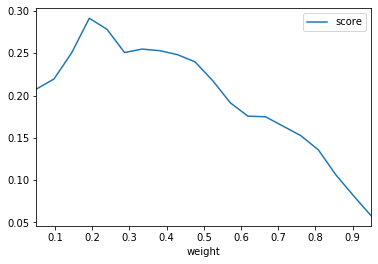

In [70]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [71]:
logmodel = LogisticRegression(class_weight={0: 0.19210526315789472, 1: 0.8078947368421052})
logmodel.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0,
                   class_weight={0: 0.19210526315789472, 1: 0.8078947368421052},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=None, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)

In [72]:
prediction_test = logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

In [73]:
print('class report data test')
print(classification_report(y_test,prediction_test))
print('============================================')
print('class report data train')
print(classification_report(y_train,prediction_train))

class report data test
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      3292
           1       0.21      0.52      0.30       422

    accuracy                           0.72      3714
   macro avg       0.57      0.63      0.56      3714
weighted avg       0.84      0.72      0.77      3714

class report data train
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      7730
           1       0.20      0.55      0.30       935

    accuracy                           0.72      8665
   macro avg       0.57      0.64      0.56      8665
weighted avg       0.85      0.72      0.77      8665

